In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import os
import sys

sys.path.append('/coc/scratch/anarayanan68/mint/')
os.chdir('/coc/scratch/anarayanan68/mint/')

In [36]:
from mint.core import inputs
from mint.core import model_builder
from mint.utils import config_util
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

In [4]:
config_path = '/coc/scratch/anarayanan68/mint/configs/audio_with_primitives_aligned.config'
name_enc_config_path = '/coc/scratch/anarayanan68/mint/configs/audio_with_primitives_aligned-name_enc.yml'

In [5]:
expt_root = '/coc/scratch/anarayanan68/mint/_expts/audio_with_primitives_aligned/'

enc_pkl_path = os.path.join(expt_root, 'enc_data.pkl')
checkpoint_dir = os.path.join(expt_root, 'checkpoints/')

In [6]:
configs = config_util.get_configs_from_pipeline_file(config_path)
model_config = configs['model']
eval_config = configs['eval_config']
eval_dataset_config = configs['eval_dataset']

In [7]:
name_enc_config_yaml = config_util.read_yaml_config(name_enc_config_path)

In [8]:
# Model build & restore

model = model_builder.build(model_config, is_training=False,
    name_encoder_config_yaml=name_enc_config_yaml, dataset_config=eval_dataset_config)

checkpoint_manager=tf.train.CheckpointManager(
    tf.train.Checkpoint(model=model),
    directory=checkpoint_dir,
    max_to_keep=None)

In [15]:
# eval dataset
eval_dataset = inputs.create_input(
      train_eval_config=eval_config,
      dataset_config=eval_dataset_config,
      is_training=False,
      use_tpu=False,
      overfit_expt=True,
      random_encoding_seed=73)

In [19]:
blend_x = None
for x in eval_dataset:
    if np.count_nonzero(x['motion_name_enc'].numpy()) > 2:
        blend_x = x
        break

blend_x

{'motion_name_enc': <tf.Tensor: shape=(1, 20), dtype=float32, numpy=
 array([[0.        , 0.        , 0.        , 0.17592348, 0.        ,
         0.        , 0.        , 0.        , 0.07971754, 0.        ,
         0.        , 0.        , 0.74435896, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]],
       dtype=float32)>,
 'target': <tf.Tensor: shape=(1, 20, 60, 147), dtype=float32, numpy=
 array([[[[-6.6273543e-03,  1.9642428e+00,  5.3781533e-01, ...,
            4.6690316e-03,  9.9998897e-01, -4.7027873e-04],
          [-6.3456465e-03,  1.9635929e+00,  5.3791237e-01, ...,
            4.6246918e-03,  9.9998915e-01, -5.5800698e-04],
          [-5.9689954e-03,  1.9624866e+00,  5.3791904e-01, ...,
            4.7647497e-03,  9.9998838e-01, -7.0130441e-04],
          ...,
          [ 2.1428587e-02,  1.9542736e+00,  4.6560493e-01, ...,
            8.3695538e-04,  9.9999726e-01,  2.2002803e-03],
          [ 3.3262312e-02,  1.9551346e+00,  4.598

In [20]:
blend_op = model(blend_x)
blend_op

<tf.Tensor: shape=(1, 180, 147), dtype=float32, numpy=
array([[[ 5.7448512e-01, -3.8674730e-01, -1.4553317e+00, ...,
          1.6150355e-01, -6.5833732e-02, -1.5508947e+00],
        [ 6.1630547e-01, -3.1571841e-01, -1.3104318e+00, ...,
          1.7382352e-01, -4.6418607e-04, -1.4631248e+00],
        [ 5.8543754e-01, -4.3327352e-01, -1.4188973e+00, ...,
          8.2532540e-02,  1.5331790e-02, -1.5423385e+00],
        ...,
        [ 3.1969056e+00,  1.4975297e-01,  3.2793100e+00, ...,
          5.2018209e+00, -7.7930784e-01, -3.9230876e+00],
        [ 2.7811131e+00, -8.2077831e-03,  3.1967096e+00, ...,
          4.6169534e+00, -7.8542644e-01, -4.8362446e+00],
        [ 1.7523623e+00, -2.3535837e-01,  1.9539099e+00, ...,
          2.1024835e+00,  1.6642224e+00, -2.7954011e+00]]], dtype=float32)>

In [33]:
(
    model.layers,
    '=====',
    model.layers[0].motion_transformer,
    model.layers[0].audio_transformer,
    model.layers[0].cross_modal_layer,
    model.layers[0].cross_modal_layer.transformer_layer,
    '=====',
    model.layers[0].motion_transformer.net.layers[-2],
    model.layers[0].audio_transformer.net.layers[-2],
    model.layers[0].cross_modal_layer.transformer_layer.net.layers[-2],
    '=====',
    model.layers[0].motion_transformer.net.layers[-2].fn.fn.attn,
    model.layers[0].audio_transformer.net.layers[-2].fn.fn.attn,
    model.layers[0].cross_modal_layer.transformer_layer.net.layers[-2].fn.fn.attn,
)

([<mint.core.fact_model.FACTModel at 0x7fa2c18d0310>,
 '=====',
 '=====',
 '=====',
 <tf.Tensor: shape=(1, 10, 120, 120), dtype=float32, numpy=
 array([[[[0.00833236, 0.00840703, 0.00853427, ..., 0.00832766,
           0.00853212, 0.00813915],
          [0.00835437, 0.0083924 , 0.00852992, ..., 0.00833208,
           0.00852382, 0.0081371 ],
          [0.00834471, 0.00840006, 0.0085258 , ..., 0.00833489,
           0.00853732, 0.00807671],
          ...,
          [0.00837733, 0.00839489, 0.00851961, ..., 0.00831942,
           0.00852505, 0.0080862 ],
          [0.00835555, 0.00840816, 0.0085257 , ..., 0.00834282,
           0.00852085, 0.00810687],
          [0.00834485, 0.00839799, 0.00855105, ..., 0.0083277 ,
           0.00850355, 0.00810564]],
 
         [[0.00828534, 0.00836133, 0.00834395, ..., 0.00833225,
           0.00839643, 0.0085277 ],
          [0.00826016, 0.00835198, 0.00834162, ..., 0.00835142,
           0.008401  , 0.00851149],
          [0.00830207, 0.00834937, 0.0

In [34]:
cross_tfmr_net = model.layers[0].cross_modal_layer.transformer_layer.net
cross_modal_attns = tf.stack([
    cross_tfmr_net.layers[i].fn.fn.attn
    for i in range(0, len(cross_tfmr_net.layers), 2)
])
cross_modal_attns.shape

TensorShape([12, 1, 10, 180, 180])

(180, 180)


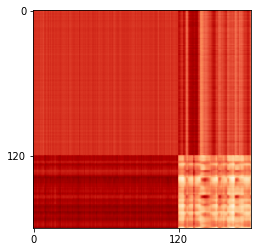

In [73]:
sample_map = cross_modal_attns[-2,0,0]
print(sample_map.shape)

cmap = plt.cm.OrRd
plt.xticks((0,120))
plt.yticks((0,120))
plt.imshow(sample_map, cmap=cmap)
# plt.imshow(np.ones_like(sample_map) - np.eye(len(sample_map)), cmap=cmap) # uncomment for a general idea of the color map

In [78]:
# %matplotlib inline
%matplotlib notebook
num_layers, batch_size, num_heads, set_len = cross_modal_attns.shape[:-1]

fig, axs = plt.subplots(nrows=num_layers, ncols=num_heads, figsize=(num_layers*6,num_heads*2))
cmap = plt.cm.OrRd
for l in range(num_layers):
    for h in range(num_heads):
        ax = axs[l,h]
        ax.set_xticks((0,120))
        ax.set_yticks(())
        ax.set_title(f'Layer {l+1}/{num_layers}, head {h+1}/{num_heads}')
        ax.imshow(cross_modal_attns[l,0,h,:60,:], cmap=cmap)

fig.supxlabel('Attention heads (parallel) ->')
fig.supylabel('<- Transformer blocks (sequential)')
fig.suptitle('Cross-Modal Layer: Attentions')
# plt.show()
fig.tight_layout()
fig.savefig('/coc/scratch/anarayanan68/mint/_expts/audio_with_primitives_aligned/crossmodal_attn_viz.png', facecolor='white')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
sample_map[1:] - sample_map[:-1]

<tf.Tensor: shape=(179, 180), dtype=float32, numpy=
array([[-1.8253922e-05, -1.6315375e-05, -2.5763642e-05, ...,
         2.5628135e-05,  3.4350902e-05,  5.1862560e-05],
       [ 7.3597766e-06, -6.4116903e-06,  9.0911053e-06, ...,
        -2.4196692e-05, -7.3835254e-06,  3.0449126e-05],
       [ 1.6537495e-05,  3.1916890e-05,  2.5335699e-05, ...,
        -1.0638032e-05, -3.0121766e-05, -6.3753687e-05],
       ...,
       [ 1.4230609e-05,  1.3932586e-05,  1.6285572e-05, ...,
        -9.9875033e-05, -1.4839694e-05, -2.8135255e-05],
       [ 2.0175241e-05,  2.8952956e-05,  1.8548686e-05, ...,
        -1.3350463e-04, -8.6270738e-05, -1.0533631e-04],
       [ 8.2766637e-06,  5.3413212e-05, -2.6262831e-05, ...,
        -2.3287721e-06, -4.7626439e-05, -6.2575564e-05]], dtype=float32)>